In [213]:
import numpy as np
import sklearn
from sklearn import *
import pandas as pd
import matplotlib.pyplot as plt
def posOnly(fi):
    a= np.random.normal(fi,1,100)
    val=0.0
    for i in a:
        if i>0:
            val=i
            break
    return val        
def negOnly(fi):
    a= np.random.normal(fi,1,100)
    val=-0.0
    for i in a:
        if i<0:
            val=i
            break
    return val       
# Square Exponential Kernel Function.
def sq_exp_kernel(X1, X2, l=1.0,v=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return (np.add(v * np.exp(-0.5 / l**2 * sqdist),np.eye(X1.shape[0],X1.shape[0])*.00001))

In [214]:
s= np.random.uniform(-1,1,100).reshape(100,1)

In [215]:
target=[]
for i in s:
    if i>=0:
        target.append(1)
    else:
        target.append(0)
        import random
z=[]
for i in target:
    if i==1:
        z.append(random.uniform(0.01, 1))
    else:
        z.append(random.uniform(-1, 0))
zvec= np.array(z)
zvec=zvec.reshape((100,1))

In [216]:
#cov=sklearn.metrics.pairwise.rbf_kernel(s, Y=None, gamma=0.5) + np.eye(100,100)*0.00001
cov = sq_exp_kernel(s,s)

In [217]:
fcov=np.linalg.inv(np.linalg.inv(cov) + np.eye(100,100))

In [218]:
flist=[]
zlist=[]
n_samps=10000
for i in range(n_samps):
    fmean= np.dot(fcov,zvec)
    f_samples=np.random.multivariate_normal(fmean.flatten(), fcov, 1).T
    flist.append(f_samples)
    zz=np.zeros(100)
    for i in range(100):
        if target[i] == 0:
            val=negOnly(f_samples[i])
            zvec[i]=val
            zz[i]=val
        else:
            val=posOnly(f_samples[i])
            zvec[i]=val
            zz[i]=val
    zlist.append(zz)     

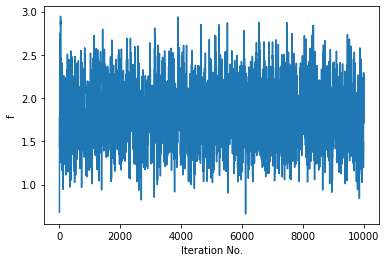

In [223]:
plt.plot(pd.DataFrame(np.array(flist).reshape(n_samps,100))[91])
plt.xlabel("Iteration No.")
plt.ylabel("f")
plt.show()

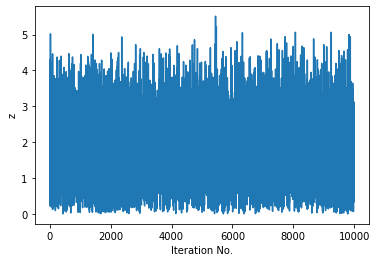

In [224]:
plt.plot(pd.DataFrame(np.array(zlist).reshape(n_samps,100))[91])
plt.xlabel("Iteration No.")
plt.ylabel("z")
plt.show()

In [225]:
target[91]

1